## Naive Bayes Classifier

**From [Wikipedia]:**

In statistics, naive Bayes classifiers are a family of linear "probabilistic classifiers" which assumes that the features are conditionally independent, given the target class. The strength (naivety) of this assumption is what gives the classifier its name. These classifiers are among the simplest Bayesian network models.

The Naive Bayes algorithm is a statistical classification technique that's used in a variety of real-world applications, including: 
- Text classification: Used to classify documents into one or more classes. 
- Sentiment analysis: Used to analyze feelings or sentiments, such as positive, negative, or neutral. 
- Spam filtering: Used to determine if an email is spam. 
- Recommendation systems: Used to predict if a user will receive a resource. 
- Medical diagnosis: Used to help doctors diagnose patients and indicate if they are at high risk for certain diseases. 
- Weather prediction: Used to predict if the weather will be good or bad. 
- Face recognition: Used to identify faces or other features, such as the eyes, nose, or mouth. 

In [3]:
import pandas as pd

df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.Category, test_size=0.2, random_state=14)
X_train

2617            I went to ur hon lab but no one is there.
315             You made my day. Do have a great day too.
5016    I think the other two still need to get cash b...
3569           Sent me de webadres for geting salary slip
2294    Hello. Damn this christmas thing. I think i ha...
                              ...                        
3833                                                  Ok.
2454                         How much she payed. Suganya.
1292    Hey babe! I saw you came online for a second a...
5464    I will treasure every moment we spend together...
2667    * Was a nice day and, impressively, i was sens...
Name: Message, Length: 4457, dtype: object

### The X column contains the SMS text. For ML training, we need to convert the text into numbers.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_test_count = v.transform(X_test)    # use fit_transform() for X_train, just transform() for X_test
# X_train_count.toarray()

### ML model training using Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
# MultinomialNB is for text processing like SMS spam analysis
# GaussianNB is for continuous data (age, salary, score)
# BernoulliNB is for data category represented as 0 or 1

model = MultinomialNB()
model.fit(X_train_count, y_train)   # use the X_train_count that converted text into a count vector

MultinomialNB()

### ML Model Evaluation: Precision, Recall, F1 score

In [48]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_count)
report = classification_report(y_test, y_pred)
print(report)  # precision, recall and f1 scores are very high...indicates the model is very good

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       967
        spam       0.97      0.94      0.96       148

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### ML Model: Confusion Matrix

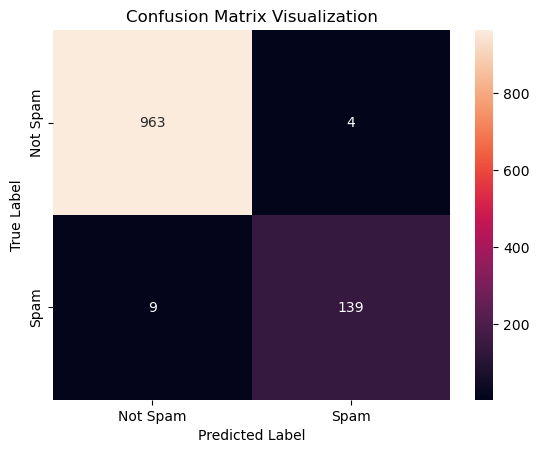

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Spam','Spam'], yticklabels=['Not Spam','Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

### Prediction on Sample Emails

In [91]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'Hello, I have an urgent update about your social security account'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam', 'spam'], dtype='<U4')